# ***EXP 4***

In [ ]:
!pip install numpy tensorflow matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255) to (0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for ANN input (flatten 28x28 to 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Data Loaded and Preprocessed")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data Loaded and Preprocessed


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))                        # Second hidden layer
model.add(Dense(10, activation='softmax'))                     # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model Created and Compiled")


Model Created and Compiled


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

print("Model Training Complete")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8817 - loss: 0.4147 - val_accuracy: 0.9596 - val_loss: 0.1356
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9669 - loss: 0.1090 - val_accuracy: 0.9624 - val_loss: 0.1171
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9776 - loss: 0.0710 - val_accuracy: 0.9690 - val_loss: 0.1067
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9831 - loss: 0.0516 - val_accuracy: 0.9675 - val_loss: 0.1080
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0385 - val_accuracy: 0.9745 - val_loss: 0.0840
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9901 - loss: 0.0323 - val_accuracy: 0.9771 - val_loss: 0.0735
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9916 - loss: 0.0255 - val_accuracy: 0.9783 - val_loss: 0.0788
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9931 - loss: 0.02

In [ ]:
# Evaluate model accuracy on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9693 - loss: 0.1362
Test Accuracy: 97.52%


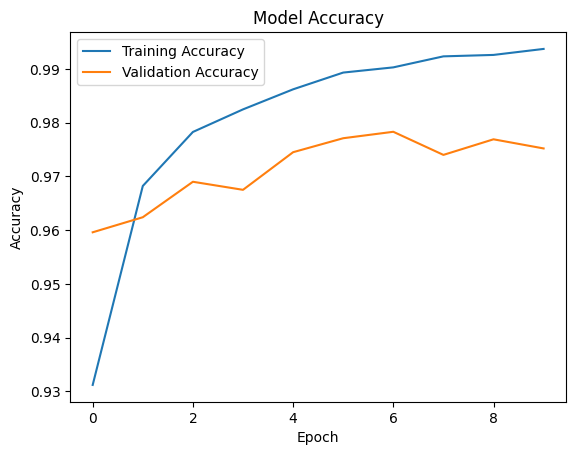

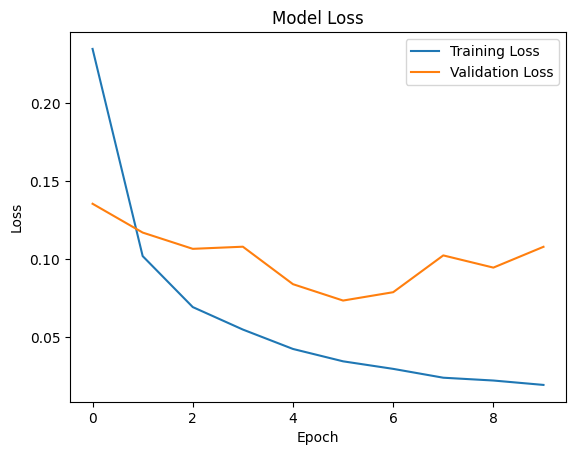

In [ ]:
# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


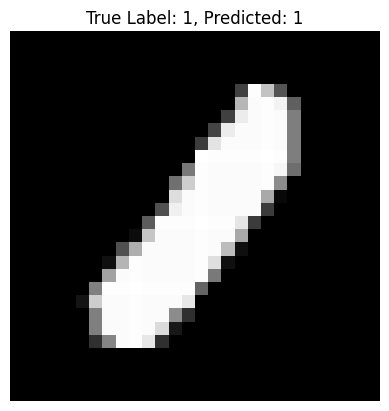

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


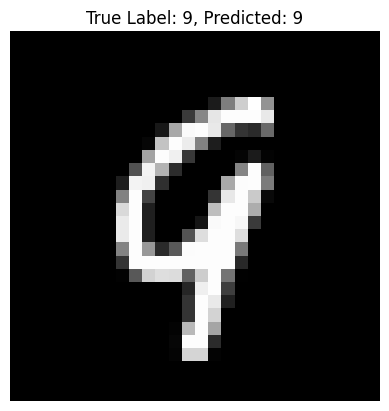

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


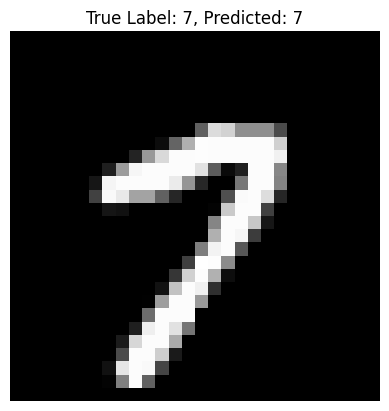

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


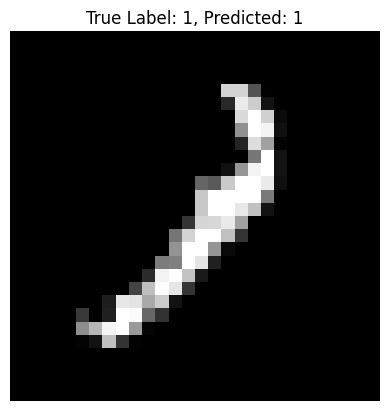

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


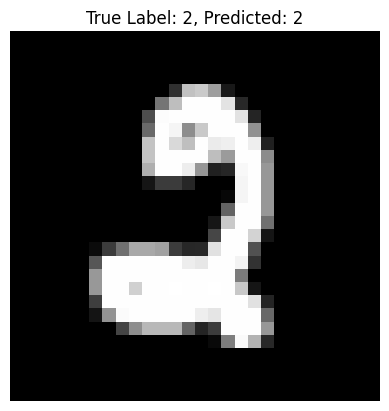

In [ ]:
import random

# Choose a few random test samples to visualize
num_samples = 5
for i in range(num_samples):
    # Select a random index from the test set
    idx = random.randint(0, X_test.shape[0] - 1)

    # Get the model's prediction for this sample
    prediction = model.predict(X_test[idx].reshape(1, 784))  # Reshape to match model's input
    predicted_label = np.argmax(prediction)
    true_label = np.argmax(y_test[idx])

    # Display the image with predicted and true labels
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


# ***EXP 6***

In [ ]:
!pip install pandas numpy scikit-learn

In [ ]:
import pandas as pd

# Download MovieLens dataset
!wget -q https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip -q ml-latest-small.zip

In [ ]:
# Load the ratings and movies data
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

# Display the first few rows of ratings and movies
print("Ratings Data:")
print(ratings.head())
print("\nMovies Data:")
print(movies.head())


Ratings Data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357276 sha256=cbfff42b2d7ec94aa0b974acd320f0cd42e09df5fb96ef8aa93626903b0a2f45
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import dump

# Load the dataset into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Build the SVD model
model = SVD()
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.2f}")


RMSE: 0.8685
RMSE: 0.87


In [ ]:
def get_movie_recommendations(movie_name, n_recommendations=10):  # Increased default to 10
    # Get the movie ID
    movie_id = movies[movies['title'].str.contains(movie_name, case=False)].iloc[0]['movieId']

    # Get all movie IDs
    all_movie_ids = ratings['movieId'].unique()

    # Get predictions for all movies for a specific user
    user_id = ratings['userId'].sample(1).values[0]  # Random user
    predictions = [model.predict(user_id, movie_id) for movie_id in all_movie_ids]

    # Create a DataFrame of movie predictions
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df['movieId'] = pred_df['iid']

    # Merge with movies DataFrame to get titles
    recommendations = pred_df.merge(movies, on='movieId', how='left')

    # Sort by estimated rating
    recommendations = recommendations.sort_values(by='est', ascending=False)

    return recommendations[['title', 'est']].head(n_recommendations)

# Example of getting recommendations
movie_name = "Toy Story"
recommended_movies = get_movie_recommendations(movie_name, n_recommendations=15)  # Requesting 15 recommendations
print(f"Recommendations for '{movie_name}':")
print(recommended_movies)


Recommendations for 'Toy Story':
                                                  title       est
166                                  Matrix, The (1999)  5.000000
16                                  Pulp Fiction (1994)  5.000000
722   Dr. Strangelove or: How I Learned to Stop Worr...  5.000000
34                     Silence of the Lambs, The (1991)  5.000000
354                Bridge on the River Kwai, The (1957)  5.000000
356                                   Unforgiven (1992)  5.000000
2395                          Lawrence of Arabia (1962)  4.999427
238                             Dark Knight, The (2008)  4.997019
232                    Shawshank Redemption, The (1994)  4.992297
864                                Graduate, The (1967)  4.976075
332                                  Rear Window (1954)  4.929254
1184                        Boondock Saints, The (2000)  4.916695
4                            Usual Suspects, The (1995)  4.916265
1102  Good, the Bad and the Ugly, The (Buon

In [ ]:
# Function to get recommendations and handle potential errors
def get_movie_recommendations(movie_name):
    # Check if the movie exists in the dataset
    if movie_name in movie_titles:
        idx = movie_indices[movie_name]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]  # Get top 10 recommendations
        movie_indices_list = [i[0] for i in sim_scores]
        return movie_df['title'].iloc[movie_indices_list]
    else:
        return f"Movie '{movie_name}' not found in the dataset."

# Function to display recommendations for multiple movies
def show_recommendations_for_movies(movie_names):
    for movie_name in movie_names:
        print(f"\nRecommendations for '{movie_name}':")
        recommended_movies = get_movie_recommendations(movie_name)
        print(recommended_movies)

# List of movie names to get recommendations for
movie_names_list = ["The Shawshank Redemption", "The Godfather", "Toy Story", "The Dark Knight", "Pulp Fiction"]

# Display recommendations
show_recommendations_for_movies(movie_names_list)


HTTPError: HTTP Error 404: Not Found

# ***EXP 5***

refer this https://www.kaggle.com/code/muhammedtariq99/hand-sign-multi-class-classification-cnn-97


In [ ]:
# Step 1: Install Required Libraries
!pip install tensorflow opencv-python


In [ ]:
# Step 2: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
# Downloading the ASL alphabet dataset from GitHub
!wget --no-check-certificate \
    https://github.com/ahmedbesbes/asl-dataset/archive/refs/heads/main.zip \
    -O asl_alphabet.zip

# Unzip the dataset
!unzip asl_alphabet.zip


--2024-11-05 05:53:30--  https://github.com/ahmedbesbes/asl-dataset/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-05 05:53:30 ERROR 404: Not Found.

Archive:  asl_alphabet.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of asl_alphabet.zip or
        asl_alphabet.zip.zip, and cannot find asl_alphabet.zip.ZIP, period.


In [ ]:
# Step 1: Install Required Libraries
!pip install tensorflow opencv-python

# Step 2: Download the ASL Alphabet Dataset
!wget --no-check-certificate \
    https://github.com/ahmedbesbes/asl-dataset/archive/refs/heads/main.zip \
    -O asl_alphabet.zip

# Step 3: Unzip the Dataset
from zipfile import ZipFile

with ZipFile('asl_alphabet.zip', 'r') as zip_ref:
    zip_ref.extractall('asl_alphabet')  # Extracts to 'asl_alphabet' directory

# Step 4: Set Up Imports and Preprocess the Data
import os
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the directory for the dataset
data_dir = 'asl_alphabet/asl_alphabet/asl_alphabet'  # Adjust path according to extracted files

# Load images and labels
images = []
labels = []

for label in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, label)):
        for image_file in os.listdir(os.path.join(data_dir, label)):
            img_path = os.path.join(data_dir, label, image_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  # Resize to 64x64
            images.append(img)
            labels.append(label)

images = np.array(images) / 255.0  # Normalize the images
labels = np.array(labels)

# Step 5: Encode the Labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(labels)

# Step 6: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Step 7: Data Augmentation
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Step 8: Build the CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

# Step 9: Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 10: Train the Model
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_test, y_test),
          epochs=10)

# Step 11: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


--2024-11-05 05:54:57--  https://github.com/ahmedbesbes/asl-dataset/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-05 05:54:57 ERROR 404: Not Found.



BadZipFile: File is not a zip file